In [11]:
# Add lib input sys.path
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import numpy as np
import pandas as pd

import libs.linear_models as lm
import libs.data_util as data

import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

%matplotlib inline

#### Exercise 4.1

* For $h(x) \in \mathcal{H}_2$, we have $h(x) = a_0 + a_1x + a_2x^2$, the parameters are $a_0, a_1, a_2$.
* For $h(x) \in \mathcal{H}_{10}$, we have $h(x) = \sum^{10}_{k=0} a_k x^k$.

For any given $h(x) \in \mathcal{H}_2$, we have $h(x) = a_0 + a_1x + a_2x^2 = \sum^{10}_{k=0} a_k x^k$ where $a_k = 0$ when $k\gt 2$. So $h(x) \in \mathcal{H}_{10}$ as well. We thus conclude $\mathcal{H}_2 \subset \mathcal{H}_{10}$.

#### Exercise 4.2
Reading exercise.

#### Exercise 4.3

* (a) Consider a given $\mathcal{H}$
  * If the best approximation from $\mathcal{H}$ is less complex than the initial target function, then when we increase the complexity of $f$, the deterministic noise in general should increase, since it'll be harder for functions in $\mathcal{H}$ to fit the target function. There'll be a higher tendency to overfit. 
  * If the best approximation from $\mathcal{H}$ is more complex than the initial target function, then when we increase the complexity of $f$, the deterministic noise in general may decrease first, reducing the deterministic noise and there'll be a lower tendency to overfit. But once the complexity of $f$ exceeds the best function approximation from $\mathcal{H}$, and if we continue increase the complexity of $f$, we will increase the deterministic noise and thus increase the tendency to overfit.
  
* (b) Given a fixed $f$ 
  * If the best approximation from $\mathcal{H}$ is less complex than the target function, then when we decrease the complexity of $\mathcal{H}$, we increase the deterministic noise thus increasing the tendency of overfit. 
  * If the best approximation from $\mathcal{H}$ is more complex than the target function, then when we decrease the complexity of $\mathcal{H}$, we will decrease the deterministic noise thus decreasing the tendency of overfit. Well, if we continue to decrease the complexity of $\mathcal{H}$, passing the point where its complexity is equal to $f$, we start to increase the deministic noise again and thus increasing overfit.
  
#### Exercise 4.4

Let's compute $E_{in}(w)$: 

\begin{align*}
E_{in}(w) &= \frac{1}{N}\sum^N_{n=1}\left(w^Tz_n - y_n\right)^2\\
&= \frac{1}{N} \|Zw - y\|^2\\
&= \frac{1}{N} (Zw - y)^T(Zw - y)\\
&= \frac{1}{N} (w^TZ^T - y^T)(Zw - y)\\
&= \frac{1}{N} w^TZ^TZw - w^TZ^Ty - y^TZw + y^Ty\\
\end{align*}

On the other hand, the equation (4.3) is

\begin{align*}
E_{in}(w) &= \frac{(w-w_{lin})^TZ^TZ(w-w_{lin})+y^T(I-H)y}{N}\\
&= \frac{(w^T-w^T_{lin})Z^TZ(w-w_{lin})+y^Ty-y^THy}{N}\\
&= \frac{w^TZ^TZw-w^TZ^TZw_{lin}-w^T_{lin}Z^TZw+w^T_{lin}Z^TZw_{lin}+y^Ty-y^THy}{N}\\
&= \frac{w^TZ^TZw-w^TZ^TZ(Z^TZ)^{-1}Z^Ty-\left((Z^TZ)^{-1}Z^Ty\right)^TZ^TZw}{N}\\
&+\frac{\left((Z^TZ)^{-1}Z^Ty\right)^TZ^TZ(Z^TZ)^{-1}Z^Ty+y^Ty-y^TZ(Z^TZ)^{-1}Z^Ty}{N}\\
&= \frac{w^TZ^TZw-w^TZ^Ty-y^TZ(Z^TZ)^{-T}Z^TZw}{N}\\
&+\frac{y^TZ(Z^TZ)^{-T}Z^TZ(Z^TZ)^{-1}Z^Ty+y^Ty-y^TZ(Z^TZ)^{-1}Z^Ty}{N}\\
&= \frac{w^TZ^TZw-w^TZ^Ty-y^TZ(Z^TZ)^{-1}Z^TZw}{N}\\
&+\frac{y^TZ(Z^TZ)^{-1}Z^Ty+y^Ty-y^TZ(Z^TZ)^{-1}Z^Ty}{N}\\
&= \frac{w^TZ^TZw-w^TZ^Ty-y^TZw+y^Ty}{N}\\
\end{align*}

This agrees with the result derived above. So we proved equation (4.3).

* (a) The value of $w$ that minimizes $E_{in}$ is $w_{lin}$, since it makes the first term $0$, which is a quadratic term on $w$ and is greater or equal to $0$ all the time. The second term doesn't depend on $w$. 

* (b) The minimum in-sample error when $w=w_{lin}$ is simply the second term, i.e. $\min E_{in}(w) = \frac{y^T(I-H)y}{N}$.

#### Problem 4.1

As we can see from below graphs, when we increase the order, the graph of monomials $\phi_i(x)$ don't seem to become more complex. This does not correspond to the intuitive notion of increasing complexity.

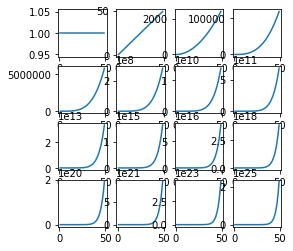

In [54]:
#### Problem 4.1 

def monomials(x, i):
    return np.exp(i*np.log(np.abs(x)))
    #return np.power(x, i) #This causes overflow

xs = np.arange(1,50,1)
figsize = plt.figaspect(1)
f, axs = plt.subplots(4, 4, figsize=figsize)
for i in np.arange(0,16):
    ys = monomials(xs, i)
    k = int(i / 4)
    j = int(i - 4*k)
    axs[k][j].plot(xs, ys)
    #axs[k][j].set_yscale('log')

#### Problem 4.2